    Gender  Age  Height  ...        CALC                 MTRANS           NObeyesdad
0   Female   21    1.62  ...          no  Public_Transportation        Normal_Weight
1   Female   21    1.52  ...   Sometimes  Public_Transportation        Normal_Weight
2     Male   23    1.80  ...  Frequently  Public_Transportation        Normal_Weight
3     Male   27    1.80  ...  Frequently                Walking   Overweight_Level_I
4     Male   22    1.78  ...   Sometimes  Public_Transportation  Overweight_Level_II
5     Male   29    1.62  ...   Sometimes             Automobile        Normal_Weight
6   Female   23    1.50  ...   Sometimes              Motorbike        Normal_Weight
7     Male   22    1.64  ...   Sometimes  Public_Transportation        Normal_Weight
8     Male   24    1.78  ...  Frequently  Public_Transportation        Normal_Weight
9     Male   22    1.72  ...          no  Public_Transportation        Normal_Weight
10    Male   26    1.85  ...   Sometimes  Public_Transportation  

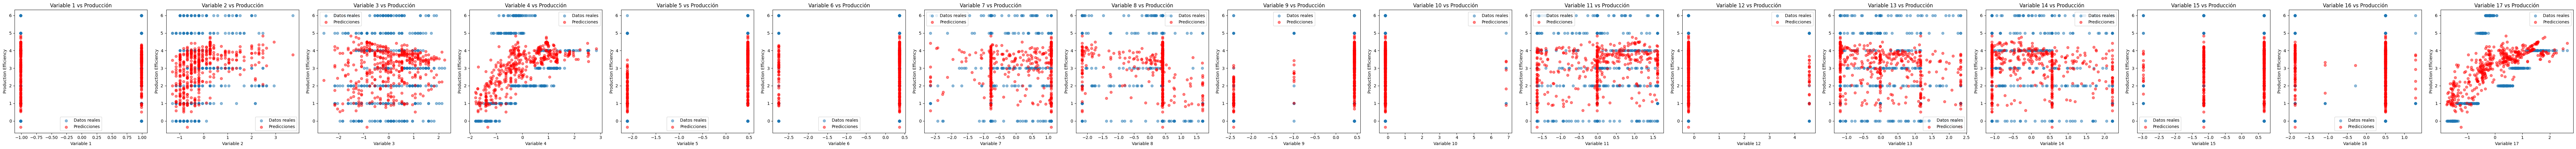

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

print(df.head(50))

labelEncoder = LabelEncoder()

weight = df['Weight']
height = df['Height']**2

imc = weight / height

df['IMC'] = imc.astype(float)

print(df['IMC'].describe())

df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['SMOKE'] = labelEncoder.fit_transform(df['SMOKE'])
df['family_history_with_overweight'] = labelEncoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = labelEncoder.fit_transform(df['FAVC'])
df['SCC'] = labelEncoder.fit_transform(df['SCC'])
df['CAEC'] = df['CAEC'].apply(lambda x: 1 if x == "no" else (2 if x == "Sometimes" else 0))
df['CALC'] = df['CALC'].apply(lambda x: 1 if x == "no" else (2 if x == "Sometimes" else 0))
df['MTRANS'] = labelEncoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = labelEncoder.fit_transform(df['NObeyesdad'])


X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Varaibles X escaladas{X_scaled.shape} {y.shape}")

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Production Efficiency'] = y


# Calcular la correlación de las variables con la variable objetivo
correlaciones = df_scaled.corr()['IMC'].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Mostrar el intercepto y los coeficientes
print("Intercepto:", modelo.intercept_)
print("Coeficientes:")
print(coeficientes)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

# plt.figure(figsize=(8,5))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.xlabel("Valores reales de Production Efficiency")
# plt.ylabel("Valores predichos")
# plt.title("Comparación entre valores reales y predichos")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Línea de referencia ideal
# plt.show()

num_vars = X_test.shape[1]  # Número de variables independientes
fig, axes = plt.subplots(1, num_vars, figsize=(5*num_vars, 5))

for i in range(num_vars):
    ax = axes[i] if num_vars > 1 else axes  # Manejo de subplots si hay solo una variable
    ax.scatter(X_test[:, i], y_test, alpha=0.5, label="Datos reales")
    ax.scatter(X_test[:, i], y_pred, alpha=0.5, color="red", label="Predicciones")
    ax.set_xlabel(f"Variable {i+1}")
    ax.set_ylabel("Production Efficiency")
    ax.set_title(f"Variable {i+1} vs Producción")
    ax.legend()

plt.tight_layout()
plt.show()